In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)


In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
csv1.head()

,sequence_identifier,read_sequence,quality,execution_time
0,@HWI-D00360:5:H814YADXX:1:1101:1205:2142 1:N:0...,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJIJJJJJIJ...,2295.125
1,@HWI-D00360:5:H814YADXX:1:1101:1244:2206 1:N:0...,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,@<;DFFFFFDDHDGGGGGGIGFGIGEIIGICHGIEDEGGHGGHHGF...,674.000
2,@HWI-D00360:5:H814YADXX:1:1101:1295:2128 1:N:0...,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJHIJJJJJJJJIJJHJJI...,757.209
3,@HWI-D00360:5:H814YADXX:1:1101:1460:2184 1:N:0...,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,;@@DDEFFHGHHHGIIIFIIIGICGCHHHGI?FHIIHDCA>GHIII...,397.042
4,@HWI-D00360:5:H814YADXX:1:1101:1597:2113 1:N:0...,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,675.000


In [3]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [4]:
#data.head()

In [5]:
#data.tail()

In [6]:
data = data.drop(csv1.index[500:]) #reduce dataset to 10% of original dataframe
#data.head()

In [7]:
data.tail()

,sequence_identifier,read_sequence,quality,execution_time
495,@HWI-D00360:5:H814YADXX:1:1101:4753:2342 1:N:0...,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,??@FFFFFHH?DFHHGHGHEEGHGGBHGAHGIBGE?C@CDFHHE9B...,5604.917
496,@HWI-D00360:5:H814YADXX:1:1101:4779:2350 1:N:0...,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,555.708
497,@HWI-D00360:5:H814YADXX:1:1101:4845:2365 1:N:0...,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,@@@DDDBDHBBDDD:G?GDEEGGH8BCHEGH?FDDFCHGGGEHHAG...,8450.375
498,@HWI-D00360:5:H814YADXX:1:1101:4891:2378 1:N:0...,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJIIJJJIJJJJJJJJ...,670.417
499,@HWI-D00360:5:H814YADXX:1:1101:4940:2382 1:N:0...,AATAAAGTAAATTGAGTGGTAACTTTACAAAGACTTCAAAGTCAGC...,CCCFFFFDHHHHHJJJGIJIIJJJJJJJJJJJJJJJJJJJJIJJJJ...,555.750


In [8]:
#data['execution_time'].describe
data.describe()

,execution_time
count,500.000000
mean,1756.348414
std,3578.852740
min,201.875000
25%,559.322250
50%,659.062500
75%,1083.666500
max,45021.584000


In [9]:
from sklearn.preprocessing import LabelEncoder
import re
def string_to_array(seq_string):
   #seq_string = seq_string.lower()
   #seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
le =LabelEncoder()

###le.fit(np.array(['A','C','G','T']))
seq_trans = le.fit_transform(data["read_sequence"])
seq_ide_trans = le.fit_transform(data["sequence_identifier"])
quali_trans = le.fit_transform(data["quality"])


In [10]:
data['seq_encoded']=seq_trans
data['seq_id_encoded']=seq_ide_trans
data['qual_encoded']=quali_trans
data.head()

,sequence_identifier,read_sequence,quality,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,@HWI-D00360:5:H814YADXX:1:1101:1205:2142 1:N:0...,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJIJJJJJIJ...,2295.125,252,39,462
1,@HWI-D00360:5:H814YADXX:1:1101:1244:2206 1:N:0...,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,@<;DFFFFFDDHDGGGGGGIGFGIGEIIGICHGIEDEGGHGGHHGF...,674.000,435,48,29
2,@HWI-D00360:5:H814YADXX:1:1101:1295:2128 1:N:0...,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJHIJJJJJJJJIJJHJJI...,757.209,67,58,432
3,@HWI-D00360:5:H814YADXX:1:1101:1460:2184 1:N:0...,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,;@@DDEFFHGHHHGIIIFIIIGICGCHHHGI?FHIIHDCA>GHIII...,397.042,129,88,4
4,@HWI-D00360:5:H814YADXX:1:1101:1597:2113 1:N:0...,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,675.000,183,122,494


In [11]:
data.nunique()

sequence_identifier    500
read_sequence          500
quality                500
execution_time         495
seq_encoded            500
seq_id_encoded         500
qual_encoded           500
dtype: int64

In [12]:
data = data.drop(['sequence_identifier','read_sequence','quality'], axis = 1)
data.head()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
0,2295.125,252,39,462
1,674.000,435,48,29
2,757.209,67,58,432
3,397.042,129,88,4
4,675.000,183,122,494


In [13]:
data.describe()

,execution_time,seq_encoded,seq_id_encoded,qual_encoded
count,500.000000,500.000000,500.000000,500.000000
mean,1756.348414,249.500000,249.500000,249.500000
std,3578.852740,144.481833,144.481833,144.481833
min,201.875000,0.000000,0.000000,0.000000
25%,559.322250,124.750000,124.750000,124.750000
50%,659.062500,249.500000,249.500000,249.500000
75%,1083.666500,374.250000,374.250000,374.250000
max,45021.584000,499.000000,499.000000,499.000000


In [14]:
Y= data[['execution_time']]
Y=np.ravel(Y)
X= data.drop('execution_time', axis =1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 3)
X_test (100, 3)
y_train (400,)
y_test (100,)


In [16]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(X_train, y_train)
#print(regr.score(X_test, y_test))

LinearRegression()

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X,Y)

RandomForestRegressor(random_state=0)

In [18]:
pd.DataFrame({'Variable':X.columns,
              'Importance':regressor.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,seq_encoded,0.446674
1,seq_id_encoded,0.287719
2,qual_encoded,0.265607


In [19]:
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
score = regressor.score(X_train,y_train)
score

0.8441174039715384

In [21]:
from sklearn.metrics import mean_squared_error
YPredict1 = regressor.predict(X_test)
mse = mean_squared_error(y_test, YPredict1)
mse

8035079.160082478

In [22]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,YPredict1)**0.5
rmsle

1.2444169422694147

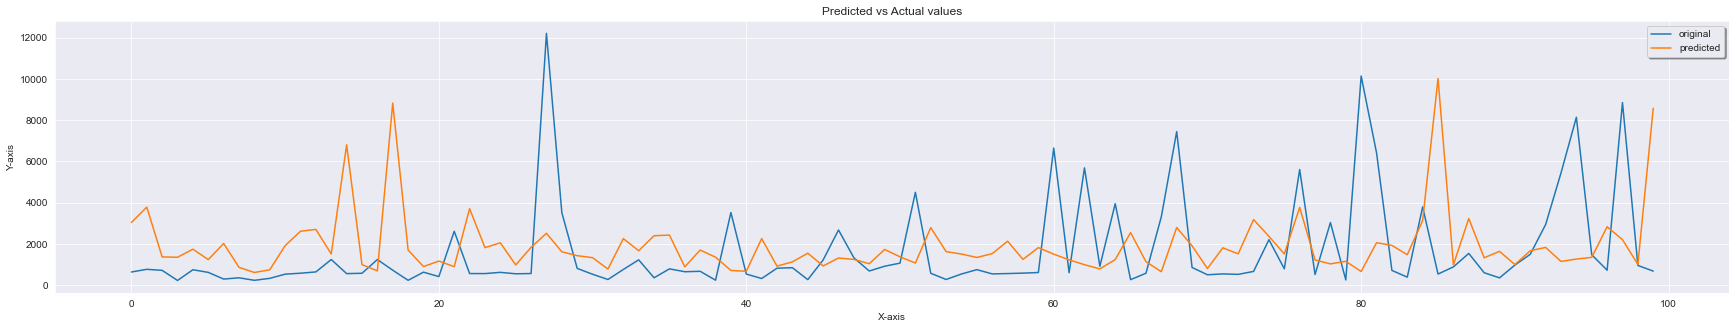

In [24]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, YPredict1, label="predicted")
plt.title("Predicted vs Actual values")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()